# Hit or Miss? Predicting Song Popularity with Audio Features

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> Can audio features and genre predict a song's popularity?

### Dataset Description 

> This data set contains information about **114,000 songs** encompassing 114 genres collected from Spotify, an audio streaming subscription service. There are **20** columns available in this dataset including: 
            <ul>
            <li> **track_id** - Spotify ID for the song</li>
            <li> **artists** - The artist(s) who performed the track (A semi-colon separates multiple artists)</li>
            <li> **album_name** - The name of the album on which the song appears</li>
            <li> **track_name** - The name of the song</li>
            <li> **popularity** - A score between 0 and 100 with 100 being the highest.  Popularity is calculated using an algorithm based on the number of times a song is played.</li>
            <li> **duration_ms** - Song length in milliseconds</li>
            <li> **explicit** - Whether or not the song has explicit lyrics</li>
            <li> **dancebility** - A score between 0.0 and 1.0 with 1.0 being the highest to determine if a song is suitable for dancing</li>
            <li> **energy** - A score between 0.0 and 1.0 with 1.0 being the highest to measure the intensity of a song</li>
            <li> **key** - The key the song is in, using integers to map to pitches in the standard Pitch Class notation</li>
            <li> **loudness** - The overall decibel level of a song</li>
            <li> **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0</li>
            <li> **speechiness** - A score of the level of spoken word in the track.  Tracks with a score over 0.66 are mostly spoken word, and between 0.33 and 0.66 contain a mix of song and spoken word</li>
            <li> **acousticness** - A score between 0.0 and 1.0 representing whether a song is acoustic</li>
            <li> **instrumentalness** - Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content</li>
            <li> **liveness** - A score between 0.0 and 1.0 representing the presence of an audience.  A value over 0.8 indicates that the song was performed to a live audience</li>
            <li> **valence** - A score between 0.0 and 1.0 representing the positivity of the song</li>
            <li> **tempo** - Estimated speed or pace of a song in beats per minute</li>
            <li> **time_signature** - The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7, indicating time signatures of 3/4 to 7/4</li>
            <li> **track_genere** - The genere of the song</li>


### Question(s) for Analysis

> This analysis will look at the relationship between a song's popularity and its audio features.   
    <ul>
    <li>Are songs with higher values for certain audio features more popular?</li>
    <li>Are certain genres more popular?</li>
    <li>Can audio features and genre predict song popularity?</li>










<a id='wrangling'></a>
## Data Wrangling
> Load in and explore the data, check for cleanliness, and trim and clean the dataset for analysis. 


In [1]:
# Import packages for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and view header

df = pd.read_csv('SpotifyDataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# Explore data types, data values and size of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Observations: `info`

There are 114,000 rows in the dataset with just one missing value for track_name. I'll drop that row from the dataset.  Because the focus of this analysis is on audio features, the only columns needed are track_name, popularity, danceability, energy, liveness, speechiness, acousticness, instrumentalness and valence.  Some other columns that might be useful as analysis progresses are duration_ms, loudness, tempo and track_genre.  

In [4]:
# Generate statistics to explore the values in the dataset

df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
# Count the number of songs with a popularity of 0

zero_value = df.query('popularity == 0').count()['track_name']

print("Number of rows with a popularity of 0: ", zero_value)

Number of rows with a popularity of 0:  16019


In [6]:
df_zero_value = df[df['popularity'] == 0]

df_zero_value.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,...,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,...,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic


### Observations:  `describe`, `query` and `count`

> There are around 16,000 songs with a popularity of 0.  After investigating the rows with zero popularity, I find that they have audio features scores that make this data applicable to the analysis.  

In [7]:
# Check for duplicate rows

duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

Number of duplicate rows:  0


### Observations:  `duplicated`
> There are no duplicate rows

<a id='cleaning'></a>
## Data Cleaning
> Based on observations, I will need to drop columns and one row with missing data.  I will also create a popularity threshold and a binary column for popular/unpopular songs.  


In [8]:
# Drop row with track_name missing

df.dropna(subset=['track_name'], inplace=True) 

In [9]:
# Create a binary column, popular/unpopular, based on a popularity score >= 70

popularity_threshold = 70
df['is_popular'] = (df['popularity'] >= popularity_threshold).astype(int)

In [10]:
# Drop columns that are not applicable to analysis and save to a clean dataframe

df_clean = df[['track_name', 'popularity', 'danceability', 'energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'is_popular']]
df_clean_plus = df[['track_name', 'popularity', 'danceability', 'energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'is_popular', 'duration_ms', 'loudness', 'tempo', 'track_genre']]
df_clean.head()

,track_name,popularity,danceability,energy,liveness,speechiness,acousticness,instrumentalness,valence,is_popular
0,Comedy,73,0.676,0.4610,0.3580,0.1430,0.0322,0.000001,0.715,1
1,Ghost - Acoustic,55,0.420,0.1660,0.1010,0.0763,0.9240,0.000006,0.267,0
2,To Begin Again,57,0.438,0.3590,0.1170,0.0557,0.2100,0.000000,0.120,0
3,Can't Help Falling In Love,71,0.266,0.0596,0.1320,0.0363,0.9050,0.000071,0.143,1
4,Hold On,82,0.618,0.4430,0.0829,0.0526,0.4690,0.000000,0.167,1


In [11]:
df_clean_plus.head()

,track_name,popularity,danceability,energy,liveness,speechiness,acousticness,instrumentalness,valence,is_popular,duration_ms,loudness,tempo,track_genre
0,Comedy,73,0.676,0.4610,0.3580,0.1430,0.0322,0.000001,0.715,1,230666,-6.746,87.917,acoustic
1,Ghost - Acoustic,55,0.420,0.1660,0.1010,0.0763,0.9240,0.000006,0.267,0,149610,-17.235,77.489,acoustic
2,To Begin Again,57,0.438,0.3590,0.1170,0.0557,0.2100,0.000000,0.120,0,210826,-9.734,76.332,acoustic
3,Can't Help Falling In Love,71,0.266,0.0596,0.1320,0.0363,0.9050,0.000071,0.143,1,201933,-18.515,181.740,acoustic
4,Hold On,82,0.618,0.4430,0.0829,0.0526,0.4690,0.000000,0.167,1,198853,-9.681,119.949,acoustic


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_name        113999 non-null  object 
 1   popularity        113999 non-null  int64  
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   liveness          113999 non-null  float64
 5   speechiness       113999 non-null  float64
 6   acousticness      113999 non-null  float64
 7   instrumentalness  113999 non-null  float64
 8   valence           113999 non-null  float64
 9   is_popular        113999 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 9.6+ MB


### Resulting dataset
> After removing unnecessary columns, a row with a missing track_name and adding a binary column, the remaining dataset contains 10 columns and 113,999 rows ready to explore through analysis.
> 

<a id='eda'></a>
## Exploratory Data Analysis

In [13]:
# Find the proportion of popular songs

popular = df_clean['is_popular'].mean()
print("Portion of songs that are popular: ", round(popular, 2))

Portion of songs that are popular:  0.05


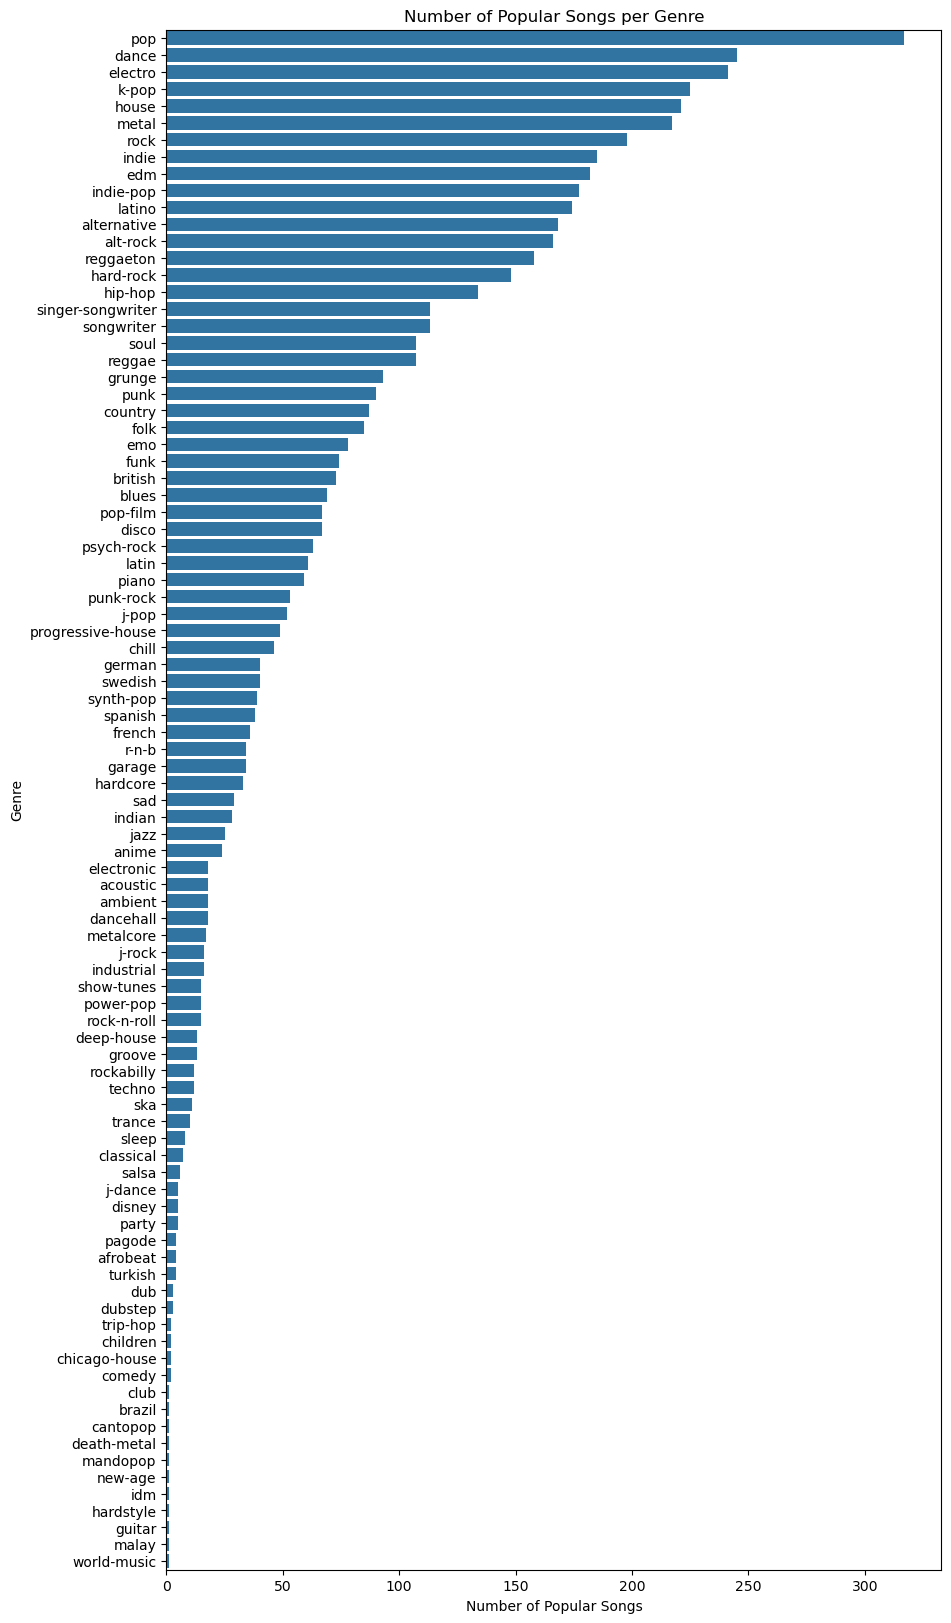

In [14]:
# Count and plot the number of popular songs per genre

popular_songs = df_clean_plus[df_clean_plus['is_popular'] == 1]
popular_per_genre = popular_songs['track_genre'].value_counts()

plt.figure(figsize=(10,20))  # taller figure to fit all genres
sns.barplot(x=popular_per_genre.values, y=popular_per_genre.index)
plt.xlabel('Number of Popular Songs')
plt.ylabel('Genre')
plt.title('Number of Popular Songs per Genre')
plt.show()


In [15]:
# Create a function to display scatter plots
def song_scatter_with_trend(x_axis, y_axis, x_label, y_label, title):
    """
    Create a scatter plot with a regression line.

    Parameters:
        x_axis: A list or array of values for the x-axis.
        y_axis: A list or array of values for the y-axis.
        x_label: The label for the x-axis.
        y_label: The label for the y-axis.
        title: The title of the plot.
    """
   
    plt.scatter(x_axis, y_axis, alpha=0.5, s=10)

    coeffs = np.polyfit(x_axis, y_axis, 1)  
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(x_axis)

    plt.plot(x_axis, y_hat, color='red', linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

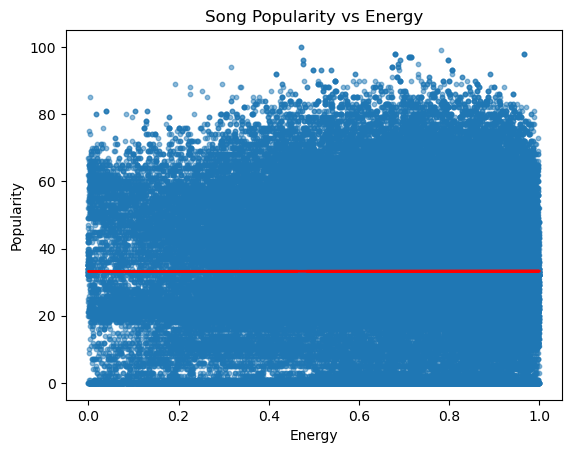

In [16]:
song_scatter_with_trend(
    df_clean['energy'], 
    df_clean['popularity'], 
    x_label="Energy", 
    y_label="Popularity", 
    title="Song Popularity vs Energy"
)

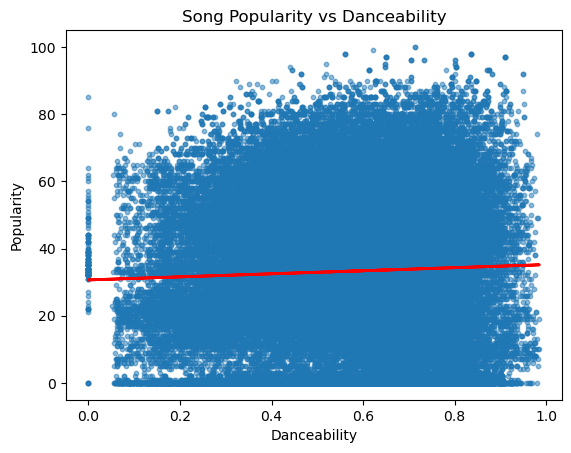

In [17]:
song_scatter_with_trend(
    df_clean['danceability'], 
    df_clean['popularity'], 
    x_label="Danceability", 
    y_label="Popularity", 
    title="Song Popularity vs Danceability"
)

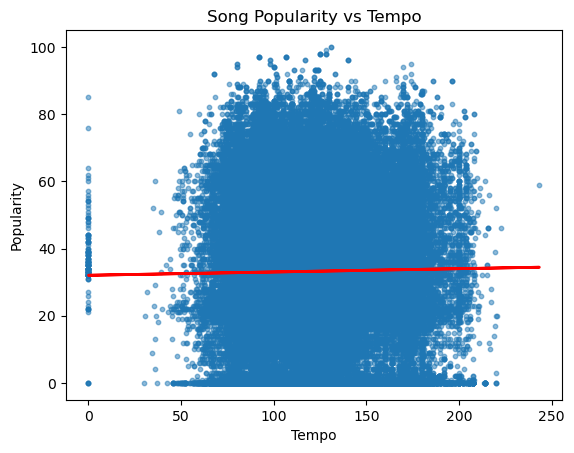

In [18]:
song_scatter_with_trend(
    df_clean_plus['tempo'], 
    df_clean_plus['popularity'], 
    x_label="Tempo", 
    y_label="Popularity", 
    title="Song Popularity vs Tempo"
)

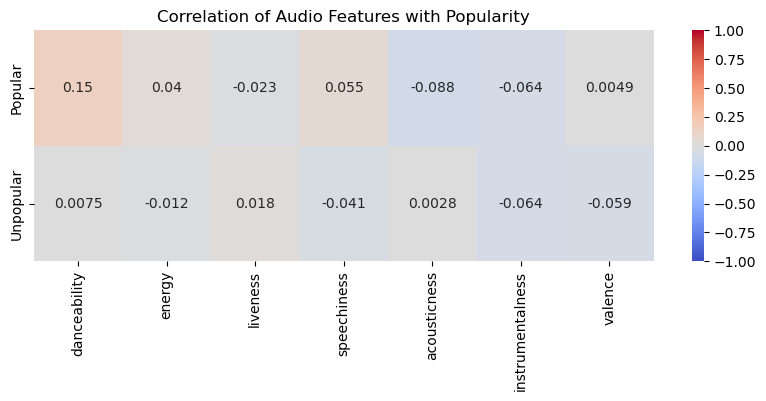

In [19]:
# View the audio features for popular and unpopular songs

audio_features = ['danceability', 'energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'valence']
popular_songs = df_clean[df_clean['is_popular'] == 1]
unpopular_songs = df_clean[df_clean['is_popular'] == 0]

popular_corr = popular_songs[audio_features + ['popularity']].corr()['popularity'].drop('popularity')
unpopular_corr = unpopular_songs[audio_features + ['popularity']].corr()['popularity'].drop('popularity')
corr_df = pd.DataFrame({'Popular': popular_corr, 'Unpopular': unpopular_corr})
corr_df = corr_df.T

plt.figure(figsize=(10,3))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Audio Features with Popularity')
plt.show()

### Obervations

>  There is a very slight correlation between danceability and popularity of a song but overall none of the audio features are a good indicator of song poularity.

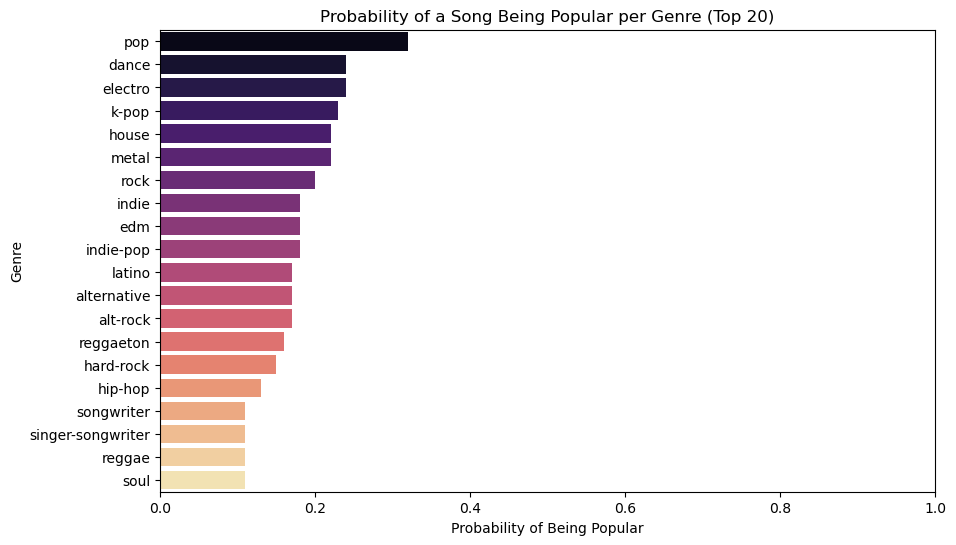

In [20]:
# Plot the probability of song popularity per genre

prob_popular_by_genre = df_clean_plus.groupby('track_genre')['is_popular'].mean().sort_values(ascending=False)

prob_popular_by_genre = prob_popular_by_genre.round(2)
top20 = prob_popular_by_genre.head(20)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top20.values, 
    y=top20.index, 
    hue=top20.index,  
    palette='magma',    
    legend=False)
plt.xlabel('Probability of Being Popular')
plt.ylabel('Genre')
plt.title('Probability of a Song Being Popular per Genre (Top 20)')
plt.xlim(0, 1)  
plt.show()

In [21]:
# Import packages for testing

from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [22]:
# Create a function for an A/B test to check feature popularity

def ab_test_feature(df, feature, threshold):    
    """
    Perform an A/B test to compare the probability of popularity 
    between songs above and below a given threshold on a feature.
    
    Parameters:
        df: Dataset containing song audio features.
        feature: Audio feature column name
        threshold: Cutoff for splitting treatment and control groups
    """

    # Split into treatment and control group

    treatment_group = df[df[feature] > threshold]
    control_group = df[df[feature] <= threshold]

    # Compute probability of popularity by group

    conv_treatment = treatment_group['is_popular'].mean()
    conv_control = control_group['is_popular'].mean()

    # z-test

    popular_songs = treatment_group['is_popular'].sum(), control_group['is_popular'].sum()
    total_songs = [len(treatment_group), len(control_group)]
    zstat, pval = proportions_ztest(popular_songs, total_songs)
    
    print(f"High-{feature} songs popularity: {conv_treatment:.2f}")
    print(f"Low-{feature} songs popularity: {conv_control:.2f}")
    print(f"z-statistic: {zstat:.2f}, p-value: {pval:.2f}")
    

In [23]:
ab_test_feature(
    df_clean, 
    feature='danceability', 
    threshold=0.7)

High-danceability songs popularity: 0.06
Low-danceability songs popularity: 0.04
z-statistic: 13.42, p-value: 0.00


In [24]:
ab_test_feature(
    df_clean, 
    feature='energy', 
    threshold=0.7)

High-energy songs popularity: 0.05
Low-energy songs popularity: 0.05
z-statistic: 3.21, p-value: 0.00


In [25]:
ab_test_feature(
    df_clean, 
    feature='liveness', 
    threshold=0.7)

High-liveness songs popularity: 0.01
Low-liveness songs popularity: 0.05
z-statistic: -13.58, p-value: 0.00


### Observations:  `Danceability`
> Songs with high danceability are more likely to be popular than songs with low danceability and live songs are not very popular among Spotify listeners.

In [26]:
# A/B for genre popularity

# Split into treatment and control group

group_t = df_clean_plus[df_clean_plus['track_genre'].str.lower() == 'pop']    
group_c = df_clean_plus[df_clean_plus['track_genre'].str.lower() != 'pop']    

# Compute probability of popularity by group

conv_t = group_t['is_popular'].mean()
conv_c = group_c['is_popular'].mean()

print(f"Pop songs popularity: {conv_t:.2f}")
print(f"Other genres popularity: {conv_c:.2f}")

# z-test

popular_songs = [group_t['is_popular'].sum(), group_c['is_popular'].sum()]
total_songs = [len(group_t), len(group_c)]

zstat, pval = proportions_ztest(popular_songs, total_songs)
print(f"z-statistic: {zstat:.2f}, p-value: {pval:.3f}")

Pop songs popularity: 0.32
Other genres popularity: 0.05
z-statistic: 39.97, p-value: 0.000


                Genre  Pop % Popular  Genre % Popular  z-stat  p-value
0               dance          0.317            0.245    3.58   0.0003
1             electro          0.317            0.241    3.79   0.0002
2               k-pop          0.317            0.225    4.62   0.0000
3               house          0.317            0.221    4.84   0.0000
4               metal          0.317            0.217    5.05   0.0000
5                rock          0.317            0.198    6.09   0.0000
6               indie          0.317            0.185    6.81   0.0000
7                 edm          0.317            0.182    6.98   0.0000
8           indie-pop          0.317            0.177    7.26   0.0000
9              latino          0.317            0.174    7.43   0.0000
10        alternative          0.317            0.168    7.77   0.0000
11           alt-rock          0.317            0.166    7.89   0.0000
12          reggaeton          0.317            0.158    8.35   0.0000
13    

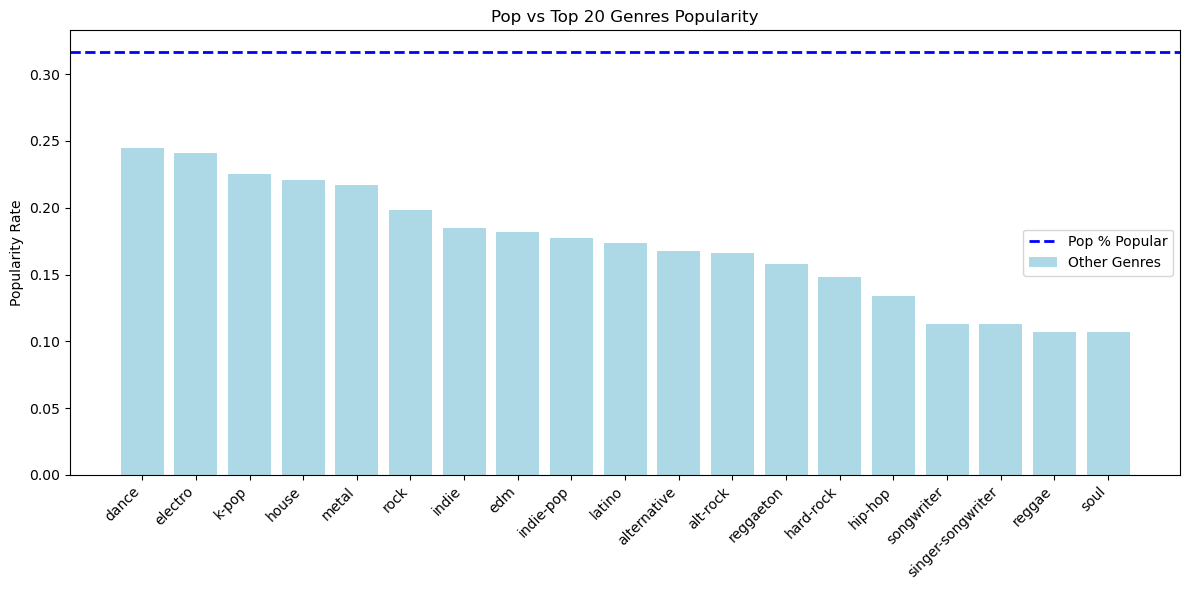

In [27]:
# Compare pop songs to other genres

pop_group = df_clean_plus[df_clean_plus['track_genre'].str.lower() == 'pop']
pop_count = pop_group['is_popular'].sum()
pop_n = len(pop_group)
pop_rate = pop_count / pop_n

# Find the top 20 genres by popularity

top20_genres = [g for g in top20.index if g.lower() != 'pop'] 


# Compare pop vs top 20 

results = []

for genre in top20_genres:
    genre_group = df_clean_plus[df_clean_plus['track_genre'] == genre]
    genre_count = genre_group['is_popular'].sum()
    genre_n = len(genre_group)
    
    counts = np.array([pop_count, genre_count])
    nobs = np.array([pop_n, genre_n])
    
    z_stat, p_val = proportions_ztest(counts, nobs)
    
    results.append({
        'Genre': genre,
        'Pop % Popular': round(pop_rate, 3),
        'Genre % Popular': round(genre_count / genre_n, 3),
        'z-stat': round(z_stat, 2),
        'p-value': round(p_val, 4)
    })

results_df = pd.DataFrame(results).sort_values(by='Genre % Popular', ascending=False)
print(results_df)

plt.figure(figsize=(12,6))
plt.bar(results_df['Genre'], results_df['Genre % Popular'], color='lightblue', label='Other Genres')
plt.axhline(pop_rate, color='blue', linestyle='--', linewidth=2, label='Pop % Popular')
plt.ylabel('Popularity Rate')
plt.title('Pop vs Top 20 Genres Popularity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Perform logistic regression to see how being a Pop song affects the probability of popularity 

# Drop missing values

df_clean_plus = df_clean_plus.dropna(subset=['is_popular', 'track_genre'])

# Create a binary variable: 1 if Pop, 0 otherwise

df_clean_plus['is_pop'] = (df_clean_plus['track_genre'].str.lower() == 'pop').astype(int)

# Dependent and independent variables

y = df_clean_plus['is_popular'].astype(int)   # Dependent
X = df_clean_plus[['is_pop']]                 # Independent
X = sm.add_constant(X)  

# Logistic regression

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.189263
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_popular   No. Observations:               113999
Model:                          Logit   Df Residuals:                   113997
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Sep 2025   Pseudo R-squ.:                 0.01725
Time:                        12:32:09   Log-Likelihood:                -21576.
converged:                       True   LL-Null:                       -21954.
Covariance Type:            nonrobust   LLR p-value:                9.731e-167
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0407      0.014   -213.281      0.000      -3.069      -3.013
is_pop         2.2731      0.

### Observations:  `Pop Songs`
> Pop songs are about 9.7 times more likely to be popular than songs from other genres.  

In [29]:
# Perform logistic regression to predict if a song is popular based on audio features

features = ['is_pop', 'danceability', 'energy', 'loudness', 'acousticness']

# Dependent and independent variables

y = df_clean_plus['is_popular'].astype(int)
X = df_clean_plus[features]
X = sm.add_constant(X)

# Logistic regression

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

# Odds Ratios with Confidence Intervals

odds_ratios = np.exp(result.params)
conf_int = np.exp(result.conf_int())
odds_table = pd.DataFrame({
    'OR': odds_ratios.round(2),
    'Lower CI': conf_int[0].round(2),
    'Upper CI': conf_int[1].round(2)
})
print("\nOdds Ratios:")
print(odds_table)

Optimization terminated successfully.
         Current function value: 0.182171
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             is_popular   No. Observations:               113999
Model:                          Logit   Df Residuals:                   113993
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Sep 2025   Pseudo R-squ.:                 0.05407
Time:                        12:32:13   Log-Likelihood:                -20767.
converged:                       True   LL-Null:                       -21954.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4565      0.135     -3.389      0.001      -0.720      -0.192
is_pop           2.0846

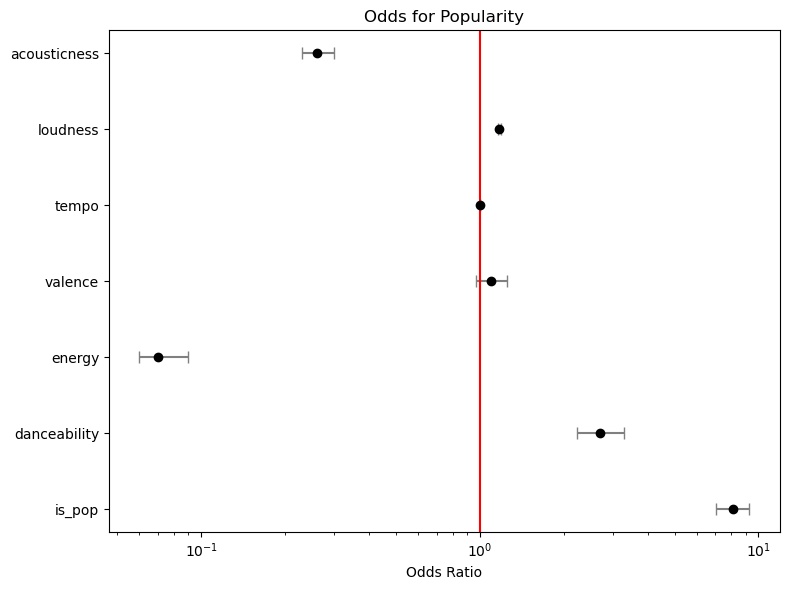

In [30]:
# Plot odds of popularity

# Data from logistic regression

features = ["is_pop", "danceability", "energy", "valence", "tempo", "loudness", "acousticness"]
odds_ratios = [8.08, 2.71, 0.07, 1.10, 1.00, 1.17, 0.26]
lower_ci = [7.02, 2.23, 0.06, 0.97, 1.00, 1.16, 0.23]
upper_ci = [9.29, 3.30, 0.09, 1.25, 1.00, 1.19, 0.30]

df_odds = pd.DataFrame({
    "Feature": features,
    "OR": odds_ratios,
    "Lower": lower_ci,
    "Upper": upper_ci
})


plt.figure(figsize=(8,6))
plt.errorbar(df_odds["OR"], df_odds["Feature"], 
             xerr=[df_odds["OR"]-df_odds["Lower"], df_odds["Upper"]-df_odds["OR"]], 
             fmt='o', color='black', ecolor='gray', capsize=4)
plt.axvline(1, color='red')
plt.xscale("log")
plt.xlabel("Odds Ratio")
plt.title("Odds for Popularity")
plt.tight_layout()
plt.show()


In [31]:
# Create a predictive model

features = ['danceability', 'energy', 'valence', 'acousticness']
X = df_clean[features]
y = df_clean['is_popular']

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf.fit(X_train, y_train)

# Predictions

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     21744
           1       0.72      0.62      0.67      1056

    accuracy                           0.97     22800
   macro avg       0.85      0.80      0.83     22800
weighted avg       0.97      0.97      0.97     22800

Confusion Matrix:
 [[21490   254]
 [  400   656]]
ROC-AUC Score: 0.868400783148817


### Conclusion and observations
> **Genre matters:**  Pop songs are consistently much more likely to be popular
> 
> **Audio features matter:**  Danceability and loudness boost popularity and acousticness and high energy reduce popularity
> 
> **Machine learning can help:**  The Random Forest model suggests real potential for predicting hits based on audio features